In [1]:
!git clone https://github.com/kenpurin/Retrosynthesis_Pytorch.git

Cloning into 'Retrosynthesis_Pytorch'...
remote: Enumerating objects: 311, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 311 (delta 13), reused 2 (delta 2), pack-reused 285
Receiving objects: 100% (311/311), 14.74 MiB | 15.23 MiB/s, done.
Resolving deltas: 100% (176/176), done.


In [2]:
!pip -q install rdkit-pypi

     |████████████████████████████████| 18.6 MB 1.4 MB/s 


In [5]:
from rdkit import Chem
import pandas as pd

In [22]:
invalid_smiles_t= True
beam_size=10
#opt_predictions='/content/predictions_USPTO-50K_model_full_version_step_500000_beam10.txt'
opt_targets='./USPTO-50K/tgt/tgt-test.txt'
opt_predictions="./predictions_optimization2.txt"

In [2]:
def canonicalize_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Chem.MolToSmiles(mol, isomericSmiles=True)
    else:
        return ''

In [3]:
def get_rank(row, base, max_rank):
  for i in range(1, max_rank+1):
    #print(row['{}{}'.format(base, i)])
    if row['target'] == row['{}{}'.format(base, i)]:
      return i
  return 0

In [23]:
with open(opt_targets, 'r') as f:
    targets = [''.join(line.strip().split(' ')) for line in f.readlines()]
targets = targets[:]
predictions = [[] for i in range(beam_size)]
test_df = pd.DataFrame(targets)
test_df.columns = ['target']
total = len(test_df)
total

5004

In [24]:
with open(opt_predictions, 'r') as f:
  for i, line in enumerate(f.readlines()):
    predictions[i % beam_size].append(''.join(line.strip().split(' ')))

In [ ]:
print(predictions[0])

In [25]:
for i, preds in enumerate(predictions):
    test_df['prediction_{}'.format(i + 1)] = preds
    test_df['canonical_prediction_{}'.format(i + 1)] = test_df['prediction_{}'.format(i + 1)].apply(
    lambda x: canonicalize_smiles(x))  

[16:28:03] SMILES Parse Error: extra close parentheses while parsing: C[C@H]1CC2(CCC3(CC2)OCCO3)OCCO3)CCN([C@H]2CCC(=O)C2Cc2ccc(Cl)cc2Cl)C1
[16:28:03] SMILES Parse Error: Failed parsing SMILES 'C[C@H]1CC2(CCC3(CC2)OCCO3)OCCO3)CCN([C@H]2CCC(=O)C2Cc2ccc(Cl)cc2Cl)C1' for input: 'C[C@H]1CC2(CCC3(CC2)OCCO3)OCCO3)CCN([C@H]2CCC(=O)C2Cc2ccc(Cl)cc2Cl)C1'
[16:28:03] SMILES Parse Error: unclosed ring for input: 'O=C1OC(=O)C2C1C1CC=CC2'
[16:28:03] SMILES Parse Error: extra open parentheses for input: 'O=C(Nc1nnc(C(F)(F)F)s1)c1ccc(Sc2ccc(NC(=O)OCC3c4ccccc4-c4ccccc43)cc2[N+](=O)[O-])c([N+](=O)[O-]'
[16:28:03] SMILES Parse Error: unclosed ring for input: 'O=C(NC[C@H]1CNC[C@H]1O)OCc1ccccc1.O=c1ccc2ncc(F)c3c2n1CC1CC3'
[16:28:03] SMILES Parse Error: extra close parentheses while parsing: CC1(C)CN=C2N3CCC[C@H](CO)N3S(=O)(=O)c3ccc4c(c3)C3(OCCCO3)OCCCO3)ccc2C1.Cc1ccc(S(=O)(=O)Cl)cc1
[16:28:03] SMILES Parse Error: Failed parsing SMILES 'CC1(C)CN=C2N3CCC[C@H](CO)N3S(=O)(=O)c3ccc4c(c3)C3(OCCCO3)OCCCO3)ccc2C1.

In [68]:
test_df

,target,prediction_1,canonical_prediction_1,prediction_2,canonical_prediction_2,prediction_3,canonical_prediction_3,prediction_4,canonical_prediction_4,prediction_5,...,prediction_6,canonical_prediction_6,prediction_7,canonical_prediction_7,prediction_8,canonical_prediction_8,prediction_9,canonical_prediction_9,prediction_10,canonical_prediction_10
0,C1=COCCC1.COC(=O)CCC(=O)c1ccc(O)cc1O,C1=COCCC1.COC(=O)CCC(=O)c1ccc(O)cc1O,C1=COCCC1.COC(=O)CCC(=O)c1ccc(O)cc1O,COC(=O)CCC(=O)c1ccc(O)cc1O.OC1CCCCO1,COC(=O)CCC(=O)c1ccc(O)cc1O.OC1CCCCO1,BrC1CCCCO1.COC(=O)CCC(=O)c1ccc(O)cc1O,BrC1CCCCO1.COC(=O)CCC(=O)c1ccc(O)cc1O,COC(=O)CCC(=O)c1ccc(O)cc1O.C1=COCCC1,C1=COCCC1.COC(=O)CCC(=O)c1ccc(O)cc1O,C1=CCCCO1.COC(=O)CCC(=O)c1ccc(O)cc1O,...,COC(=O)CCC(=O)c1ccc(O)cc1O.ClC1CCCCO1,COC(=O)CCC(=O)c1ccc(O)cc1O.ClC1CCCCO1,COC(=O)CCC(=O)c1ccc(O)cc1O.Oc1ccc(OC2,,COC(=O)CCC(=O)c1ccc(O)cc1O.CC1CCCCO1,CC1CCCCO1.COC(=O)CCC(=O)c1ccc(O)cc1O,COC(=O)CCC(=O)c1ccc(O)cc1O.CS(=O)(=O),COC(=O)CCC(=O)c1ccc(O)cc1O.C[SH](=O)=O,c1cc(O)cc(O)c1C(=O)CCC(OC)=O.C1=COCCC,
1,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N,COC(=O)c1cccc(C(=O)O)c1.Nc1ncccc1N,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N,COC(=O)c1cccc(C=O)c1.Nc1cccnc1N,...,COC(=O)c1cccc(C=O)c1.Nc1cccnc1N,COC(=O)c1cccc(C=O)c1.Nc1cccnc1N,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N,COC(=O)c1cccc(C(=O)O)c1.Nc1c(N)nccc1,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N,O=C(OC)c1cc(C(O)=O)ccc1.c1(N)c(N)nccc,
2,CC(C)(C)OC(=O)NC1CCC(C(=O)O)CC1.CNOC,CC(C)(C)OC(=O)NC1CCC(C(=O)O)CC1.CNOC,CC(C)(C)OC(=O)NC1CCC(C(=O)O)CC1.CNOC,CNOC.COC(=O)C1CCC(NC(=O)OC(C)(C)C)CC1,CNOC.COC(=O)C1CCC(NC(=O)OC(C)(C)C)CC1,CC(C)(C)OC(=O)NC1CCC(C(=O)O)CC1.CNOC,CC(C)(C)OC(=O)NC1CCC(C(=O)O)CC1.CNOC,CNOC.CON(C)C(=O)C1CCC(NC(=O)OC(C)(C)C)C,,O=C(NC1CCC(C(O)=O)CC1)OC(C)(C)C.CNOC,...,CC(C)(C)OC(=O)NC1CCC(C(=O)O)CC1.CONC,CC(C)(C)OC(=O)NC1CCC(C(=O)O)CC1.CNOC,CC(C)(C)OC(NC1CCC(C(=O)O)CC1)=O.CNOC,CC(C)(C)OC(=O)NC1CCC(C(=O)O)CC1.CNOC,N(C1CCC(C(O)=O)CC1)C(OC(C)(C)C)=O.CNOC,CC(C)(C)OC(=O)NC1CCC(C(=O)O)CC1.CNOC,CC(OC(NC1CCC(C(O)=O)CC1)=O)(C)C.CNOC,CC(C)(C)OC(=O)NC1CCC(C(=O)O)CC1.CNOC,O=C(O)C1CCC(NC(OC(C)(C)C)=O)CC1.CNOC,CC(C)(C)OC(=O)NC1CCC(C(=O)O)CC1.CNOC
3,Nc1ccc(O)cc1.O=[N+]([O-])c1ccc(Cl)nc1Cl,Nc1ccc(O)cc1.O=[N+]([O-])c1ccc(Cl)nc1Cl,Nc1ccc(O)cc1.O=[N+]([O-])c1ccc(Cl)nc1Cl,Clc1ccc([N+]([O-])=O)c(Cl)n1.c1cc(O)ccc1,O=[N+]([O-])c1ccc(Cl)nc1Cl.Oc1ccccc1,Clc1ccc([N+]([O-])=O)c(Cl)n1.Nc1ccc(O)cc,,Oc1ccc(N)cc1.[O-][N+](c1ccc(Cl)nc1Cl)=O,Nc1ccc(O)cc1.O=[N+]([O-])c1ccc(Cl)nc1Cl,Clc1ccc([N+]([O-])=O)c(Cl)n1.c1cc(N)ccc1,...,Oc1ccc(N)cc1.[O-][N+](c1c(Cl)nc(Cl)cc1)=,,Oc1ccc(N)cc1.[O-][N+](=O)c1c(Cl)nc(Cl)cc,,Clc1ccc([N+](=O)[O-])c(Cl)n1.c1cc(O)ccc1,O=[N+]([O-])c1ccc(Cl)nc1Cl.Oc1ccccc1,Clc1ccc([N+]([O-])=O)c(Cl)n1.c1c(O)ccc(N,,Clc1ccc([N+]([O-])=O)c(Cl)n1.c1(N)ccc(O),
4,[N-]=[N+]=NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([...,[N-]=[N+]=NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([...,[N-]=[N+]=NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([...,C1(CN=[N+]=[N-])=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]...,,C1(CN=[N+]=[N-])=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]...,,C1(CN=[N+]=[N-])=CC[C@@H](c2c(Cl)cc(Cl)cc2)[C@...,,C1(CN=[N+]=[N-])=CC[C@@H](c2c(Cl)cc(Cl)cc2)[C@...,...,C1C(CN=[N+]=[N-])=CC[C@@H](c2c(Cl)cc(Cl)cc2)[C...,[N-]=[N+]=NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@@H](...,C1C(CN=[N+]=[N-])=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H...,[N-]=[N+]=NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@@H](...,Clc1ccc([C@@H]2CC=C(CN=[N+]=[N-])C[C@H]2[O-])c...,[N-]=[N+]=NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([...,[N-]=[N+]=NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([...,[N-]=[N+]=NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([...,[N-]=[N+]=NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([...,[N-]=[N+]=NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,Cc1cc([N+](=O)[O

In [26]:
test_df['rank'] = test_df.apply(lambda row: get_rank(row, 'canonical_prediction_', beam_size), axis=1)
test_df['rank']

0       1
1       1
2       1
3       1
4       1
       ..
4999    1
5000    1
5001    1
5002    0
5003    0
Name: rank, Length: 5004, dtype: int64

In [27]:
correct = 0
invalid_smiles = 0

for i in range(1, beam_size+1):
    correct += (test_df['rank'] == i).sum()
    print((test_df['rank'] == i).sum(),correct)
    
    invalid_smiles += (test_df['canonical_prediction_{}'.format(i)] == '').sum()
    if invalid_smiles_t:
        print('Top-{}: {:.1f}% || Invalid SMILES {:.2f}%'.format(i, correct/total*100,
                                                                 invalid_smiles/(total*i)*100))
    else:
        print('Top-{}: {:.1f}%'.format(i, correct / total * 100))

2628 2628
Top-1: 52.5% || Invalid SMILES 3.46%
506 3134
Top-2: 62.6% || Invalid SMILES 10.29%
216 3350
Top-3: 66.9% || Invalid SMILES 14.22%
135 3485
Top-4: 69.6% || Invalid SMILES 16.50%
99 3584
Top-5: 71.6% || Invalid SMILES 18.11%
68 3652
Top-6: 73.0% || Invalid SMILES 19.53%
42 3694
Top-7: 73.8% || Invalid SMILES 20.78%
50 3744
Top-8: 74.8% || Invalid SMILES 21.94%
24 3768
Top-9: 75.3% || Invalid SMILES 22.97%
18 3786
Top-10: 75.7% || Invalid SMILES 23.81%


In [19]:
correct = 0
invalid_smiles = 0

for i in range(1, beam_size+1):
    correct += (test_df['rank'] == i).sum()
    print((test_df['rank'] == i).sum(),correct)
    
    invalid_smiles += (test_df['canonical_prediction_{}'.format(i)] == '').sum()
    if invalid_smiles_t:
        print('Top-{}: {:.1f}% || Invalid SMILES {:.2f}%'.format(i, correct/total*100,
                                                                 invalid_smiles/(total*i)*100))
    else:
        print('Top-{}: {:.1f}%'.format(i, correct / total * 100))

2272 2272
Top-1: 45.4% || Invalid SMILES 5.42%
509 2781
Top-2: 55.6% || Invalid SMILES 9.34%
263 3044
Top-3: 60.8% || Invalid SMILES 12.09%
145 3189
Top-4: 63.7% || Invalid SMILES 13.60%
94 3283
Top-5: 65.6% || Invalid SMILES 14.58%
65 3348
Top-6: 66.9% || Invalid SMILES 15.32%
58 3406
Top-7: 68.1% || Invalid SMILES 15.81%
43 3449
Top-8: 68.9% || Invalid SMILES 16.31%
35 3484
Top-9: 69.6% || Invalid SMILES 16.54%
41 3525
Top-10: 70.4% || Invalid SMILES 16.72%


In [28]:
with open('./USPTO-50K/src/src-test.txt', 'r') as f:
    srcs = [''.join(line.strip().split(' ')) for line in f.readlines()]
srcs = srcs[:]
testsrc_df = pd.DataFrame(srcs)
testsrc_df.columns = ['src']
testsrc_df

,src
0,<RX_1>COC(=O)CCC(=O)c1ccc(OC2CCCCO2)cc1O
1,<RX_4>COC(=O)c1cccc(-c2nc3cccnc3[nH]2)c1
2,<RX_2>CON(C)C(=O)C1CCC(NC(=O)OC(C)(C)C)CC1
3,<RX_1>O=[N+]([O-])c1ccc(Cl)nc1Nc1ccc(O)cc1
4,<RX_9>NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([N+](...
...,...
4999,<RX_1>Cc1cc([N+](=O)[O-])ccc1Oc1ccnc(N)c1
5000,<RX_6>COC(=O)c1[nH]c2cc(Cl)cc3c2c1C(CC(=O)O)CC3
5001,<RX_7>COc1cc(C(F)(F)F)cc(SC)c1C(=O)NC1(c2ccccc...
5002,<RX_10>Cc1nn(CC(C)CO)c(-c2ccc(F)cc2)c1Br


In [29]:
srclist=[]
tgtlist=[]
tag=[]
pred=[]
cnt=[0 for _ in range(10)]
err=[0 for _ in range(10)]
for i in range(5004):
    if int(testsrc_df['src'][i][4])!=1:
        cnt[int(testsrc_df['src'][i][4])-1]+=1
    elif testsrc_df['src'][i][5]=='0':
        cnt[9]+=1
    else:
        cnt[0]+=1
    if test_df["rank"][i]==0:
        if int(testsrc_df['src'][i][4])!=1:
            err[int(testsrc_df['src'][i][4])-1]+=1
        elif testsrc_df['src'][i][5]=='0':
            err[9]+=1
        else:
            err[0]+=1
        tag.append(i)
        srclist.append(testsrc_df['src'][i])
        tgtlist.append(test_df['target'][i])
        pred.append(test_df['canonical_prediction_1'][i])
newdf=pd.DataFrame()
newdf["tag"]=tag
newdf["src"]=srclist
newdf["tgt"]=tgtlist
newdf["pred"]=pred
newdf.to_csv(r'corrector_error.csv')

In [85]:
for i in range(10):
    print(f"{err[i]} {cnt[i]}")
    print(float(err[i])/float(cnt[i]))

452 1512
0.29894179894179895
236 1191
0.19815281276238456
253 564
0.44858156028368795
47 90
0.5222222222222223
8 65
0.12307692307692308
257 835
0.3077844311377245
126 459
0.27450980392156865
20 81
0.24691358024691357
73 184
0.3967391304347826
7 23
0.30434782608695654


In [94]:
for i in range(10):
    print(f"{err[i]} {cnt[i]}")
    print(float(err[i])/float(cnt[i]))

463 1512
0.3062169312169312
240 1191
0.20151133501259447
252 564
0.44680851063829785
49 90
0.5444444444444444
8 65
0.12307692307692308
263 835
0.3149700598802395
125 459
0.27233115468409586
20 81
0.24691358024691357
76 184
0.41304347826086957
7 23
0.30434782608695654


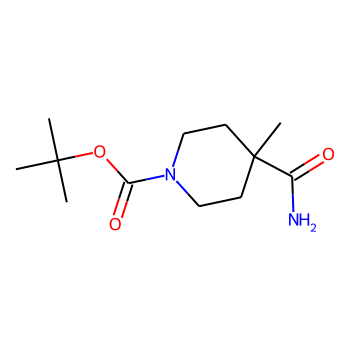

In [33]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor


mol = Chem.MolFromSmiles('CC(C)(C)OC(=O)N1CCC(C)(C(N)=O)CC1')
rdDepictor.Compute2DCoords(mol)
Draw.MolToImage(mol, size=(350,350), kekulize=True)


c-c bond:金属试剂难以预测，具体断在哪个键（CC(C)(O)C#Cc1cccc(Br)n1，C#Cc1cccc(Br)n1.CC(C)=O，Brc1cccc(Br)n1.C#CC(C)(C)O）
heterocycle formation：考虑不到断环，例如第一个rx4

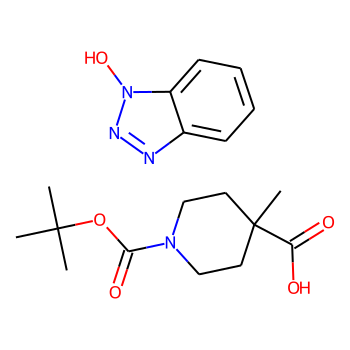

In [31]:
mol = Chem.MolFromSmiles("CC(C)(C)OC(=O)N1CCC(C)(C(=O)O)CC1.On1nnc2ccccc21")
rdDepictor.Compute2DCoords(mol)
Draw.MolToImage(mol, size=(350,350), kekulize=True)

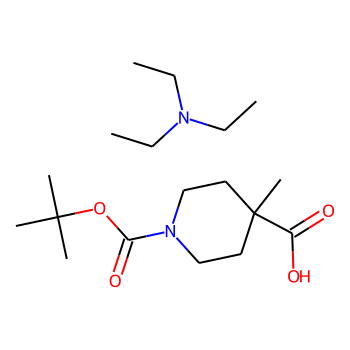

In [32]:
mol = Chem.MolFromSmiles('CC(C)(C)OC(=O)N1CCC(C)(C(=O)O)CC1.CCN(CC)CC')
rdDepictor.Compute2DCoords(mol)
Draw.MolToImage(mol, size=(350,350), kekulize=True)

b.txt


1866 1866


Top-1: 52.3% || Invalid SMILES 3.45%


367 2233


Top-2: 62.6% || Invalid SMILES 10.41%


150 2383


Top-3: 66.8% || Invalid SMILES 14.32%


96 2479


Top-4: 69.5% || Invalid SMILES 16.60%


66 2545


Top-5: 71.3% || Invalid SMILES 18.35%


48 2593


Top-6: 72.7% || Invalid SMILES 19.83%


32 2625


Top-7: 73.6% || Invalid SMILES 21.08%


37 2662


Top-8: 74.6% || Invalid SMILES 22.26%


18 2680


Top-9: 75.1% || Invalid SMILES 23.30%


13 2693


Top-10: 75.5% || Invalid SMILES 24.12%



2269 2269


Top-1: 45.3% || Invalid SMILES 7.11%


487 2756


Top-2: 55.1% || Invalid SMILES 14.41%


259 3015


Top-3: 60.3% || Invalid SMILES 19.00%


153 3168


Top-4: 63.3% || Invalid SMILES 21.61%


89 3257


Top-5: 65.1% || Invalid SMILES 23.25%


66 3323


Top-6: 66.4% || Invalid SMILES 24.49%


62 3385


Top-7: 67.6% || Invalid SMILES 25.28%


41 3426


Top-8: 68.5% || Invalid SMILES 26.05%


36 3462


Top-9: 69.2% || Invalid SMILES 26.52%


39 3501


Top-10: 70.0% || Invalid SMILES 26.86%